# Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import random

# Load Data

In [2]:
data = pd.read_csv('../input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')


In [3]:
data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


# Preapare Data

In [4]:
data['pixels'] = [np.fromstring(x, dtype=int, sep=' ').reshape(-1,48,48,1) for x in data['pixels']]

In [5]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [6]:
pixels = np.concatenate(data['pixels'])
labels = data.emotion.values

# Sample Display of Images

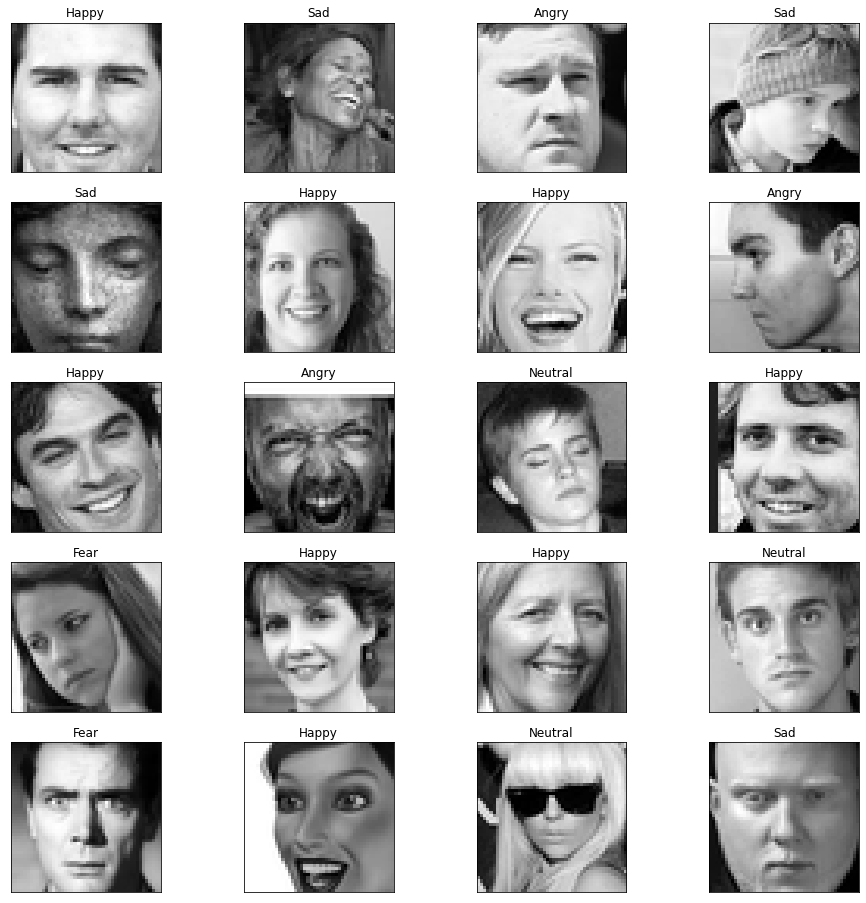

In [7]:
# Randomly plotting 20 images from the dataset

def sample_plot(x,y=None):
    #x, y are numpy arrays
    n = 20
    samples = random.sample(range(x.shape[0]),n)
    
    fig, axs = plt.subplots(5,4, figsize=(16,16), sharex=True, sharey=True)
    ax = axs.ravel()
    for i in range(n):
        ax[i].imshow(x[samples[i],:,:], cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        if y is not None:
            ax[i].set_title(emotions[y[samples[i]]])
            
sample_plot(pixels, labels)

In [8]:
def sample_emotions(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(pixels[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[labels[idx]])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

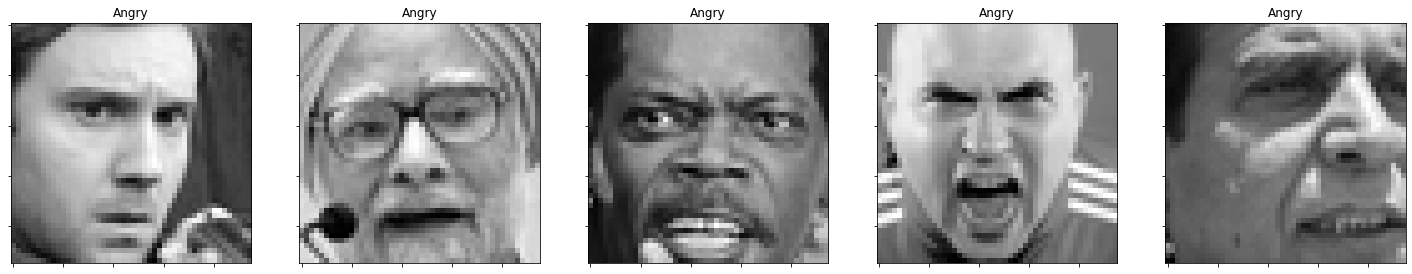

In [9]:
sample_emotions()

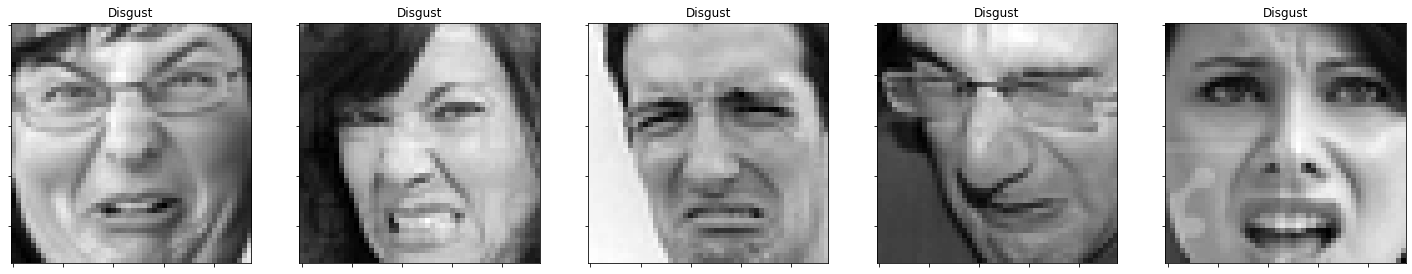

In [10]:
sample_emotions(1)

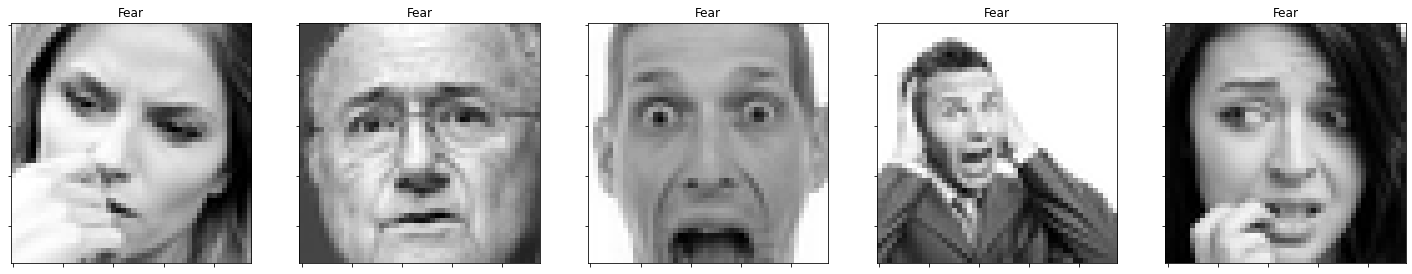

In [11]:
sample_emotions(2)

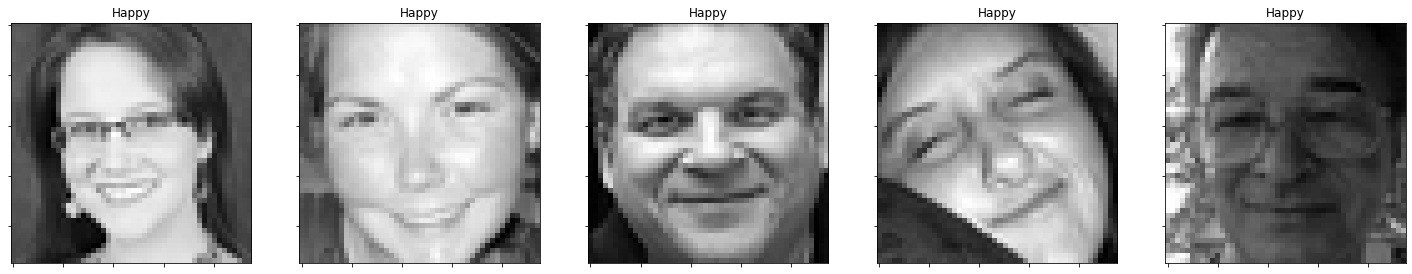

In [12]:
sample_emotions(3)

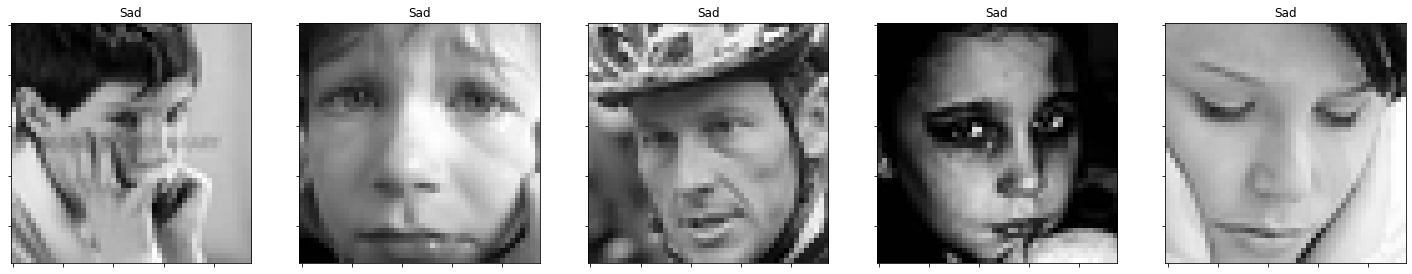

In [13]:
sample_emotions(4)

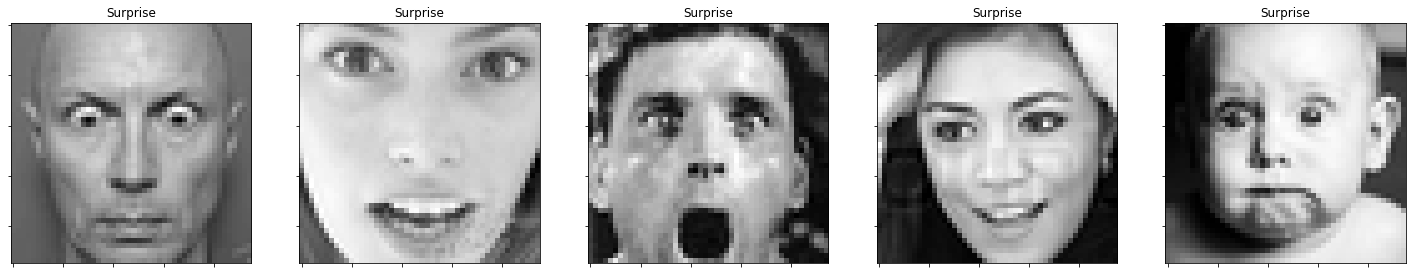

In [14]:
sample_emotions(5)

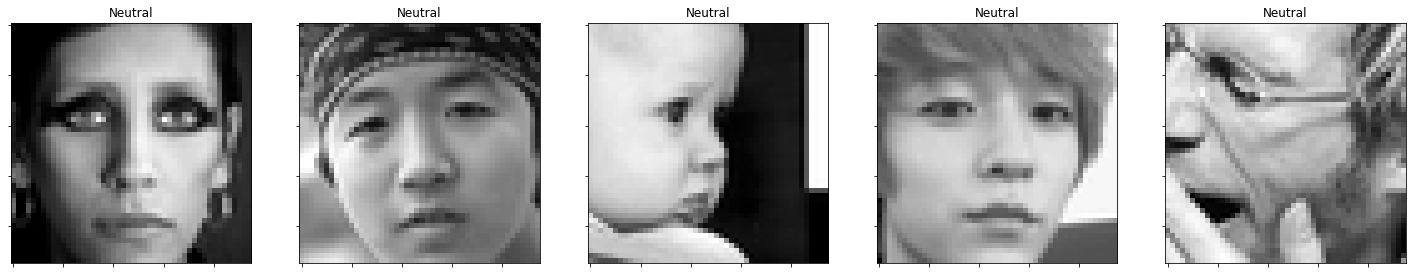

In [15]:
sample_emotions(6)

# Label distribution

In [16]:
emot_propa = (data.emotion.value_counts() / len(data)).to_frame().sort_index()
emot_propa

,emotion
0,0.139155
1,0.015187
2,0.142708
3,0.251315
4,0.168240
5,0.110453
6,0.172942


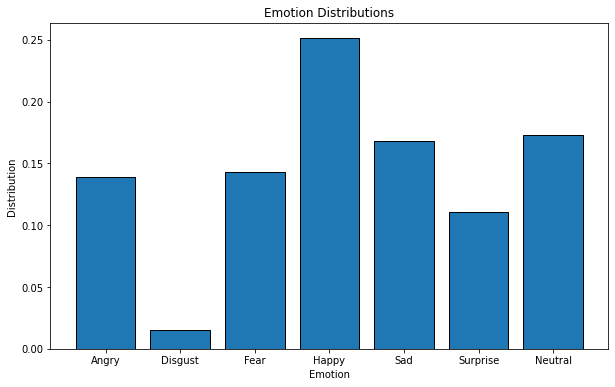

In [17]:
emotions2 = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

plt.figure(figsize=[10,6])
plt.bar(emotions2, emot_propa['emotion'], edgecolor='k')
plt.xlabel('Emotion')
plt.ylabel('Distribution')
plt.title('Emotion Distributions')
plt.show()